In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.image as mpimg

In [ ]:
pip install pydotplus

In [ ]:
company = pd.read_csv("Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
company.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


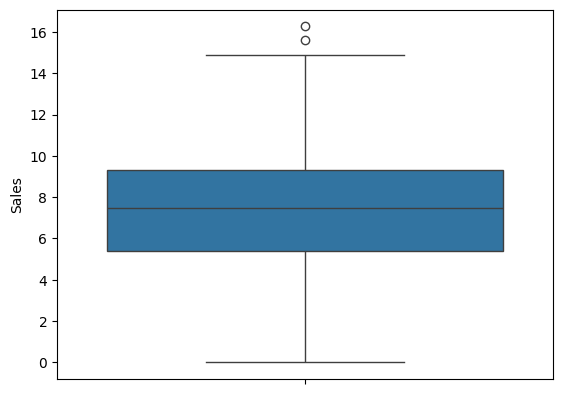

In [ ]:
ax = sns.boxplot(company['Sales'])

In [ ]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


<ipython-input-10-ee71402aeaa4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(company['Sales'],shade=True,color='g')


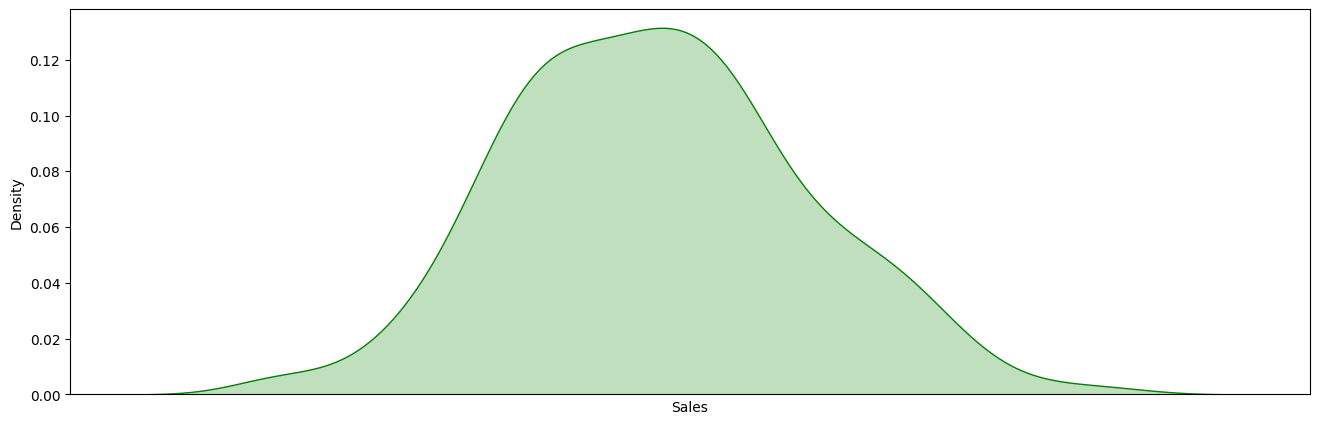

In [ ]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(company['Sales'].skew()))
print("Kurtosis: {}".format(company['Sales'].kurtosis()))
ax = sns.kdeplot(company['Sales'],shade=True,color='g')
plt.xticks([i for i in range(20,20,20)])
plt.show()

In [ ]:
obj_colum = company.select_dtypes(include='object').columns.tolist()

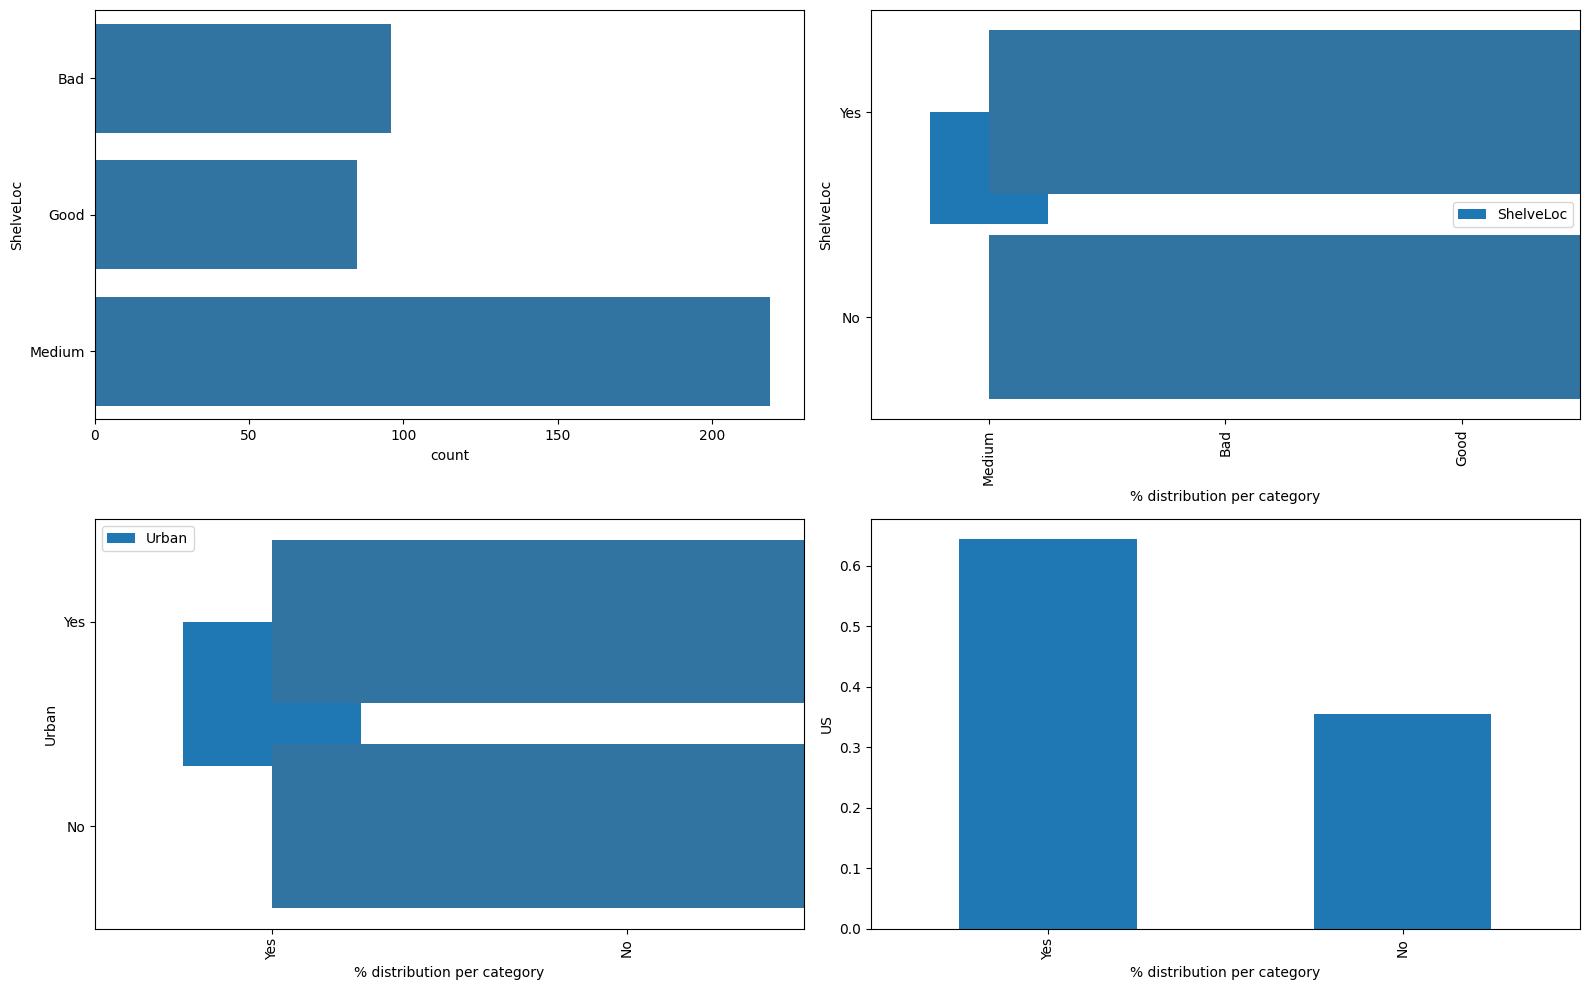

In [ ]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=company,y=col)
    plt.subplot(2,2,i+1)
    company[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [ ]:
num_columns = company.select_dtypes(exclude='object').columns.tolist()

<ipython-input-17-8d778d53df06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(company[col],color='g',shade=True)
<ipython-input-17-8d778d53df06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(company[col],color='g',shade=True)
<ipython-input-17-8d778d53df06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(company[col],color='g',shade=True)
<ipython-input-17-8d778d53df06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(company[col],color='g',shade=True)
<ipython-input-17-8d778d53df06>:4: Futur

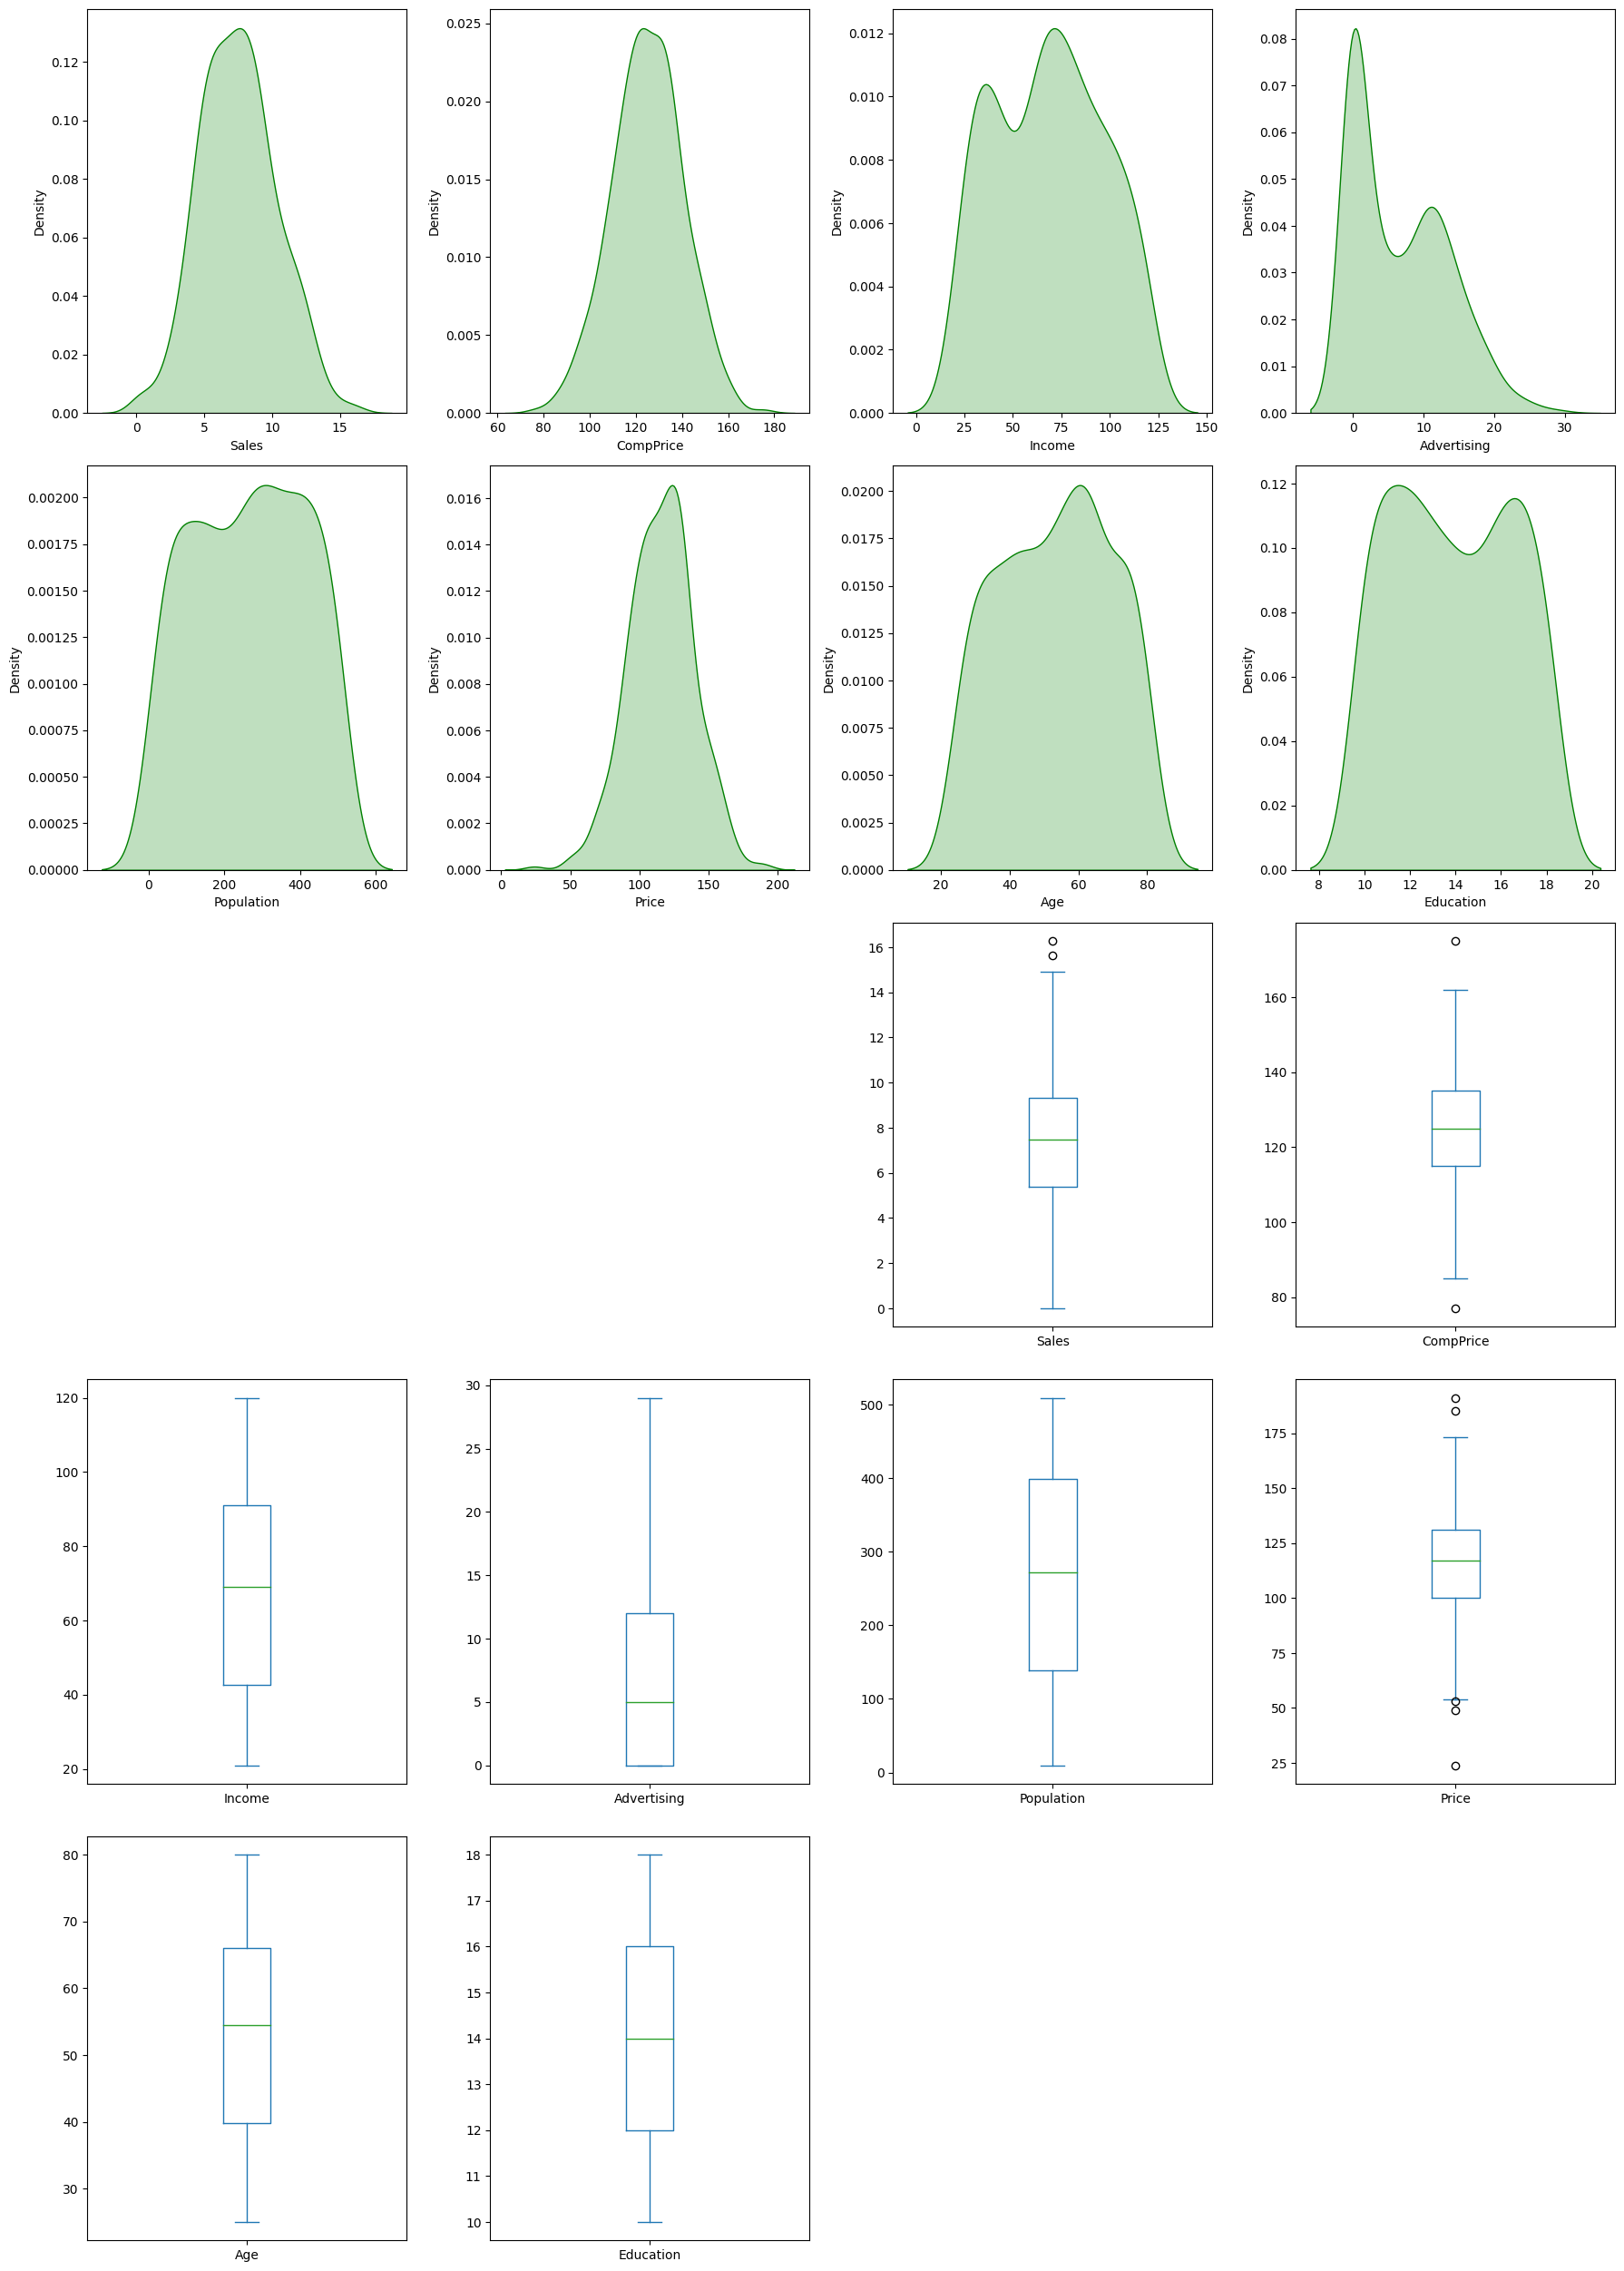

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [ ]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(company[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    company[col].plot.box()
plt.tight_layout()
plt.show()
num_data = company[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [ ]:
company = pd.get_dummies(company, columns = ['ShelveLoc','US','Urban'])

In [ ]:
corr = company.corr()

In [ ]:
corr

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,US_No,US_Yes,Urban_No,Urban_Yes
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,-0.393167,0.500510,-0.073999,-0.177093,0.177093,0.015419,-0.015419
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,-0.035393,0.026386,0.008683,-0.016869,0.016869,-0.066594,0.066594
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.072017,-0.012657,-0.051392,-0.089601,0.089601,-0.037967,0.037967
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,-0.035217,0.056149,-0.015929,-0.684460,0.684460,-0.042035,0.042035
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,0.039902,0.007789,-0.040640,-0.060564,0.060564,0.052025,-0.052025
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,-0.036220,0.045854,-0.006607,-0.057861,0.057861,-0.047016,0.047016
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,-0.044123,-0.022818,0.056613,-0.008652,0.008652,-0.028479,0.028479
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,0.012525,-0.029188,0.013242,0.078250,-0.078250,0.033094,-0.033094
ShelveLoc_Bad,-0.393167,-0.035393,0.072017,-0.035217,0.039902,-0.036220,-0.044123,0.012525,1.000000,-0.291913,-0.618133,-0.000979,0.000979,-0.081122,0.081122
ShelveLoc_Good,0.500510,0.026386,-0.012657,0.056149,0.007789,0.045854,-0.022818,-0.029188,-0.291913,1.000000,-0.571396,-0.078864,0.078864,0.039197,-0.039197


In [ ]:
X = company.iloc[:,1:15]
y = company.iloc[:,0]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
y_train.value_counts()

7.80    4
6.67    3
6.20    3
5.87    3
6.53    3
       ..
5.25    1
0.53    1
7.95    1
9.35    1
2.05    1
Name: Sales, Length: 277, dtype: int64

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.multiclass import check_classification_targets

In [ ]:
print(y_train.head())

300     8.57
66      8.85
152     7.64
247     5.04
367    14.37
Name: Sales, dtype: float64


In [ ]:
import numpy as np

In [ ]:
print(y_train.dtype)

float64


In [ ]:
y_train = y_train.astype(int)

In [ ]:
model = RandomForestClassifier(n_jobs=4, n_estimators=150, oob_score=True, criterion='entropy')
model.fit(x_train, y_train)
oob_score = model.oob_score_

In [ ]:
pred_train = model.predict(x_train)

In [ ]:
accuracy_score(y_train,pred_train)

1.0

In [ ]:
confusion_matrix(y_train,pred_train)

array([[ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 44,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 28,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 24,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 17,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0,  0,  0

In [ ]:
pred_test = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(type(y_test))
print(type(pred_test))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [ ]:
# Convert continuous variable to categorical
y_test = pd.cut(y_test, bins=20, labels=False)  # You can adjust the number of bins

In [ ]:
# Example for continuous variables
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred_test)
mse

23.575

In [ ]:
# Example for multiclass classification
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred_test)
accuracy

0.15

In [ ]:
confusion_matrix(y_test,pred_test)

array([[ 0,  5,  8,  5,  4,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  6, 12,  4, 12,  5,  2,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  3,  0,  2,  5,  1,  0]])

In [ ]:
company_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
company_t

,Actual,Predicted
331,8,8
106,0,4
130,8,10
35,19,8
70,8,11
...,...,...
40,0,5
118,8,8
338,8,6
97,8,6


In [ ]:
cols = list(company.columns)

In [ ]:
predictors = cols[1:15]
target = cols[0]

In [ ]:
tree1 = model.estimators_[20]

In [ ]:
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)

In [ ]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [ ]:
tree_small = rf_small.estimators_[5]

In [ ]:
dot_data = StringIO()

In [ ]:
export_graphviz(tree_small, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)

In [ ]:
model.feature_importances_

array([0.1200733 , 0.10980635, 0.08961973, 0.11714835, 0.15532122,
       0.11889931, 0.08660365, 0.03256164, 0.05310536, 0.03279341,
       0.01670637, 0.02207207, 0.02283369, 0.02245554])

In [ ]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                                      'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [ ]:
fi

,feature,importance
4,Price,0.155321
0,CompPrice,0.120073
5,Age,0.118899
3,Population,0.117148
1,Income,0.109806
2,Advertising,0.089620
6,Education,0.086604
8,ShelveLoc_Good,0.053105
9,ShelveLoc_Medium,0.032793
7,ShelveLoc_Bad,0.032562


#As seen in the above table price is most important feature